<a href="https://colab.research.google.com/github/Virum9520/ML_project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('matches.csv.xls')

In [ ]:
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.shape

(636, 18)

In [ ]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
# Checking null values in each column
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [ ]:
# Column 18 has all null values, directly dropping 18th column
df.drop('umpire3', axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(625, 17)

In [ ]:
df.nunique().sort_values()

result               2
toss_decision        2
dl_applied           2
season              10
win_by_wickets      11
team1               14
team2               14
toss_winner         14
winner              14
city                30
venue               34
umpire1             44
umpire2             45
win_by_runs         86
player_of_match    201
date               444
id                 625
dtype: int64

In [ ]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [ ]:
df.replace('Mumbai Indians','MI',inplace=True)
df.replace('Sunrisers Hyderabad','SRH',inplace=True)
df.replace('Gujarat Lions','GL',inplace=True)
df.replace('Rising Pune Supergiant','CSK',inplace=True)
df.replace('Royal Challengers Bangalore','RCB',inplace=True)
df.replace('Kolkata Knight Riders','KKR',inplace=True)
df.replace('Delhi Daredevils','DD',inplace=True)
df.replace('Kings XI Punjab','KXIP',inplace=True)
df.replace('Chennai Super Kings','CSK',inplace=True)
df.replace('Rajasthan Royals','RR',inplace=True)
df.replace('Deccan Chargers','DC',inplace=True)
df.replace('Kochi Tuskers Kerala','KTK',inplace=True)
df.replace('Pune Warriors','PW',inplace=True)
df.replace('Rising Pune Supergiants','RPSG',inplace=True)


Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

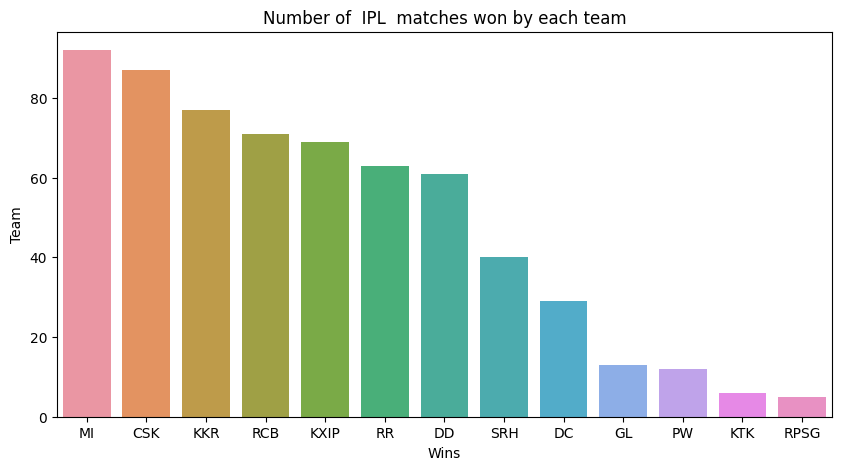

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'winner',data = df, order= df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

In [ ]:
win_percentage =  df.winner.value_counts() / (df.team1.value_counts() + df.team2.value_counts()) * 100
win_percentage= win_percentage.sort_values(ascending=False)

Text(0.5, 0, 'Teams')

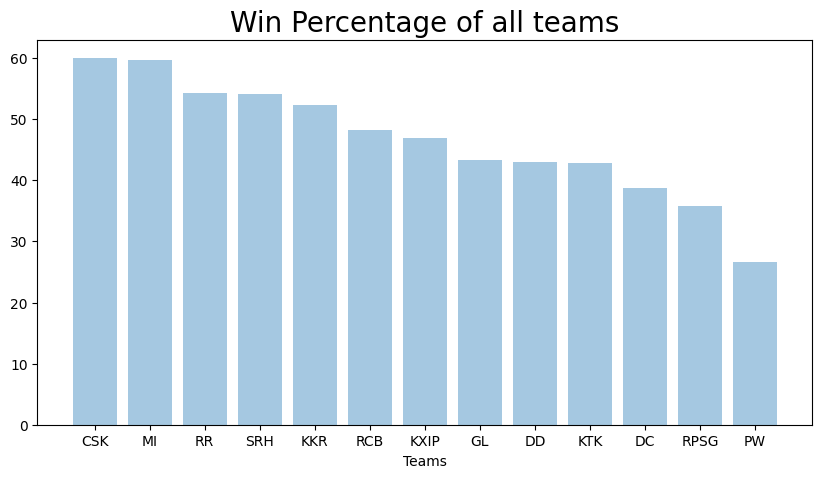

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(win_percentage.keys(), win_percentage, alpha=0.4 )
plt.tick_params()
plt.title('Win Percentage of all teams', fontsize=20)
plt.xlabel('Teams')


<Axes: title={'center': 'Winning by Wickets'}, xlabel='win_by_wickets', ylabel='winner'>

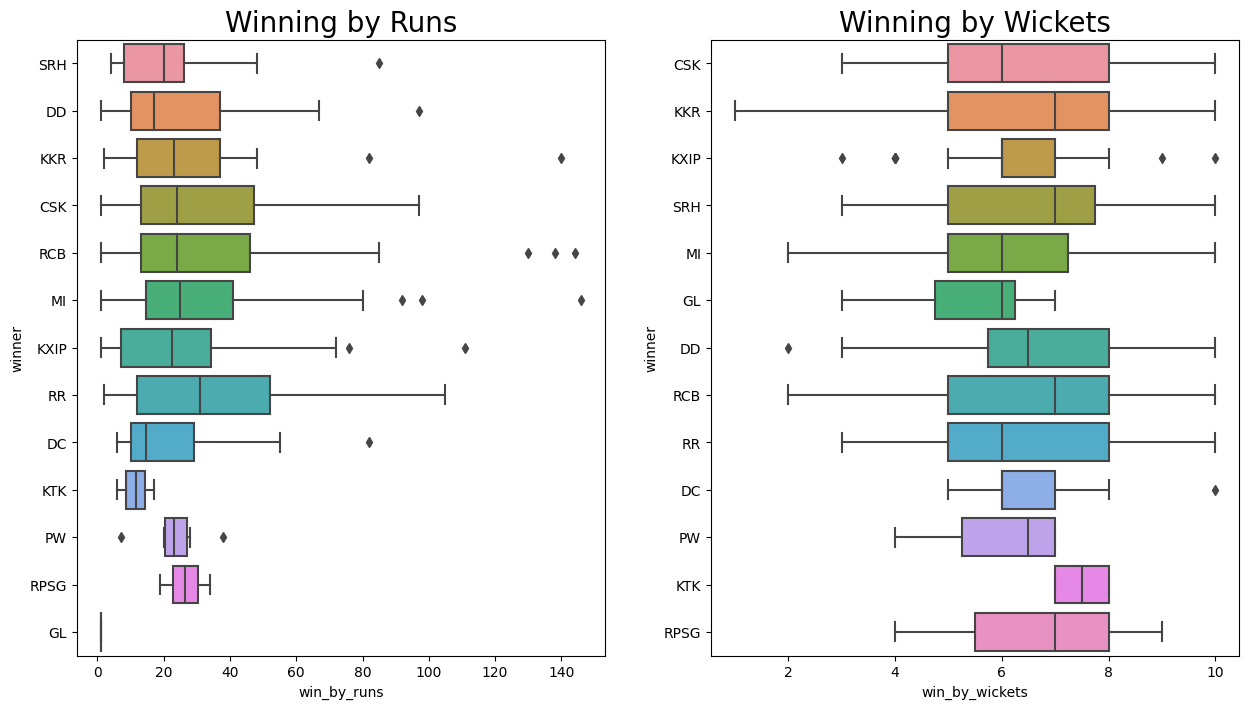

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,8)

ax[0].set_title("Winning by Runs", fontsize=20)
ax[1].set_title("Winning by Wickets", fontsize=20)

sns.boxplot(y = 'winner', x = 'win_by_runs', data=df[df['win_by_runs']>0], ax=ax[0])
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=df[df['win_by_wickets']>0], ax=ax[1])


<Axes: title={'center': 'Matches won by teams every Seoson'}, xlabel='team1', ylabel='season'>

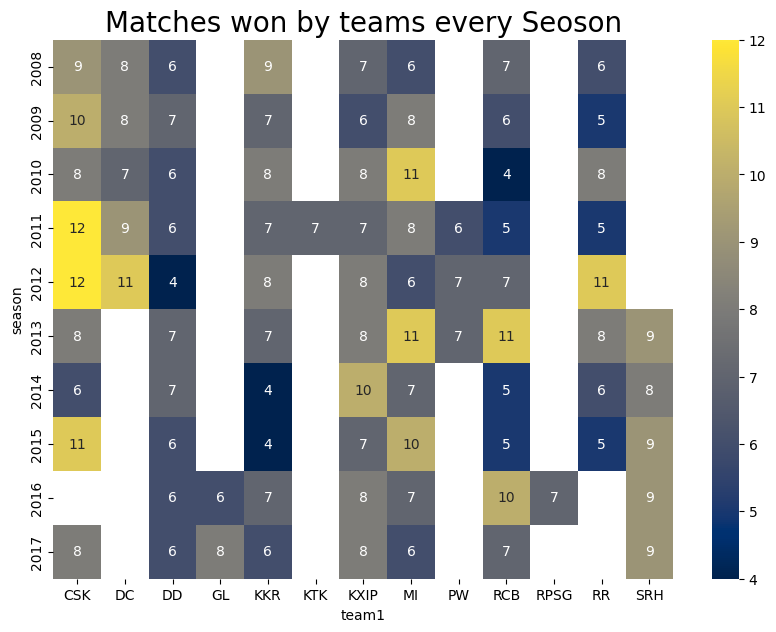

In [ ]:
player_of_the_match= pd.pivot_table(df,values=['winner'],index=['season'],columns=['team1'],aggfunc='count',margins=False)
plt.figure(figsize=(10,7))
plt.xlabel('Team')
plt.title('Matches won by teams every Seoson',fontsize=20)
sns.heatmap(player_of_the_match['winner'] ,annot=True,cmap= 'cividis')


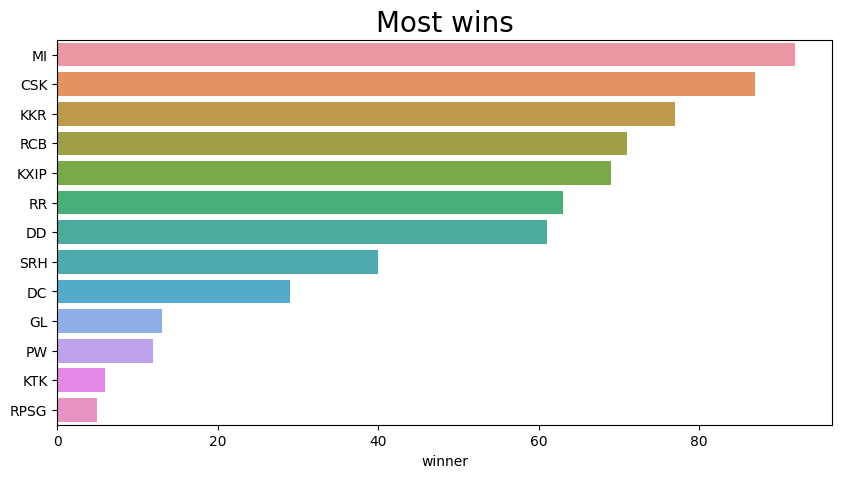

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Most wins', fontsize=20)
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

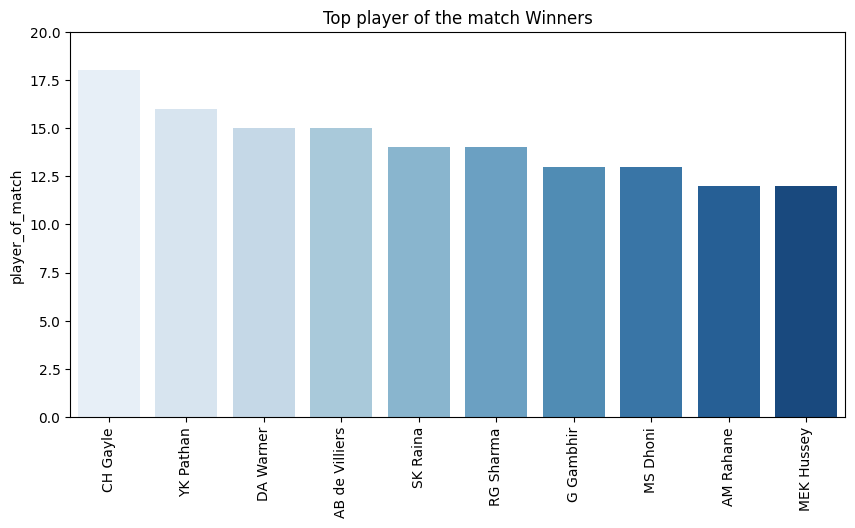

In [ ]:
top_players = df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()


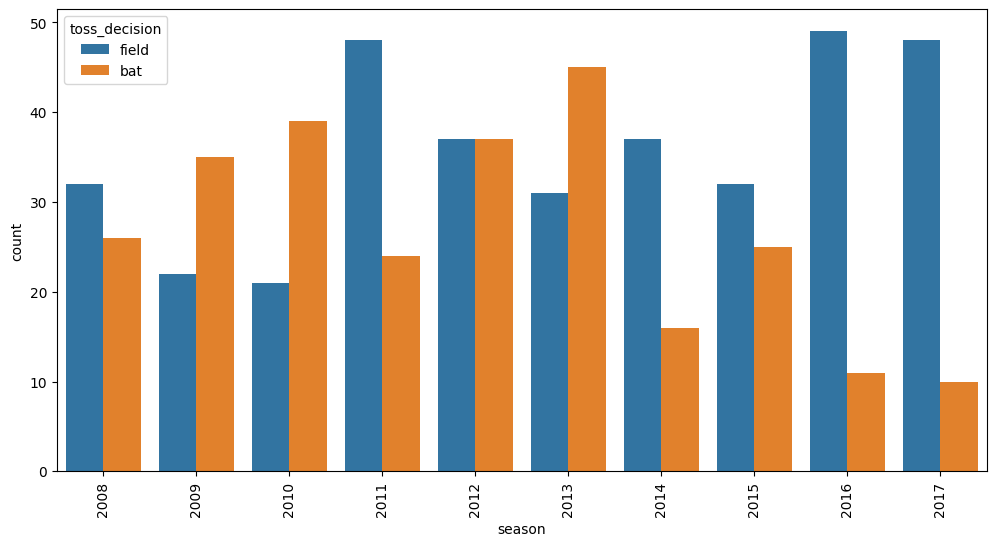

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df)
plt.xticks(rotation='vertical')
plt.show()

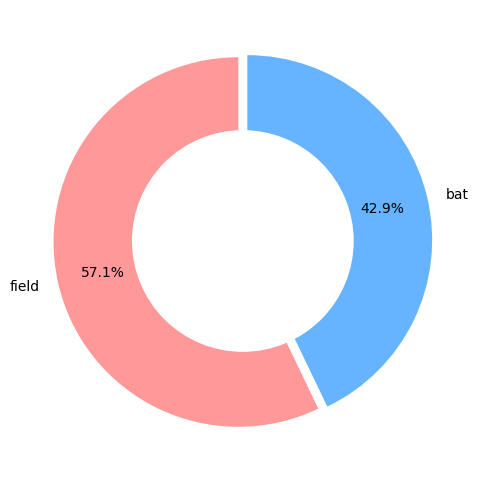

In [ ]:
plt.figure(figsize=(6,6))
sizes = df.toss_decision.value_counts()
labels = df.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#sns.jointplot(df,x=df.toss_winner,y=df.winner,kind="reg",palette='Greys')

In [ ]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,CSK,CSK,field,normal,0,CSK,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,CSK,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,GL,SRH,SRH,field,normal,0,SRH,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,DD,RCB,RCB,field,normal,0,RCB,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,GL,RCB,RCB,field,normal,0,RCB,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,SRH,KKR,KKR,field,normal,0,SRH,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,GL,SRH,SRH,field,normal,0,SRH,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


#TASK 3 : MODEL BUILDING

In [ ]:
df.drop(["id", "season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [ ]:
X = df.drop(["winner"], axis=1)
y = df["winner"]

# Label encoding categorical values


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
objList = df.columns
print (objList)

Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets'],
      dtype='object')


In [ ]:
for feat in objList:
    X[feat] = le.fit_transform(df[feat])

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   team1           625 non-null    int64
 1   team2           625 non-null    int64
 2   toss_winner     625 non-null    int64
 3   toss_decision   625 non-null    int64
 4   result          625 non-null    int64
 5   dl_applied      625 non-null    int64
 6   win_by_runs     625 non-null    int64
 7   win_by_wickets  625 non-null    int64
 8   winner          625 non-null    int64
dtypes: int64(9)
memory usage: 48.8 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,min_samples_split=3,
                               max_features = "auto")


In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features='auto', min_samples_split=3)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc*100}')

Accuracy score: 96.81528662420382


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Classification report is : ')
print(classification_report(y_test,y_pred))

Classification report is : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         5
           4       0.90      1.00      0.95        18
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        12
           7       0.96      1.00      0.98        25
           8       1.00      0.83      0.91         6
           9       0.94      1.00      0.97        16
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00        14
          12       0.90      1.00      0.95         9

    accuracy                           0.97       157
   macro avg       0.82      0.83      0.83       157
weighted avg       0.95      0.97      0.96       157



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',max_iter=1000)

In [ ]:
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred1 = logreg.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy : {accuracy*100}')

Accuracy : 85.98726114649682
